### Cell 1: Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, roc_curve
from tabulate import tabulate

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings("ignore")

## Load Vectorized Matrices from Pickle Files

In [2]:
import pickle

# Load the BoW vectorized matrices
with open('X_train_bow.pkl', 'rb') as f:
    X_train_bow = pickle.load(f)
with open('X_cv_bow.pkl', 'rb') as f:
    X_cv_bow = pickle.load(f)
with open('X_test_bow.pkl', 'rb') as f:
    X_test_bow = pickle.load(f)

# Load the TF-IDF vectorized matrices
with open('X_train_tfidf.pkl', 'rb') as f:
    X_train_tfidf = pickle.load(f)
with open('X_cv_tfidf.pkl', 'rb') as f:
    X_cv_tfidf = pickle.load(f)
with open('X_test_tfidf.pkl', 'rb') as f:
    X_test_tfidf = pickle.load(f)

# Load the Word2Vec vectorized matrices
with open('X_train_w2v.pkl', 'rb') as f:
    X_train_w2v = pickle.load(f)
with open('X_cv_w2v.pkl', 'rb') as f:
    X_cv_w2v = pickle.load(f)
with open('X_test_w2v.pkl', 'rb') as f:
    X_test_w2v = pickle.load(f)
    
    
    

# Load the y datasets from local files
with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('y_cv.pkl', 'rb') as f:
    y_cv = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)    
    

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from scipy.sparse import csr_matrix

In [6]:
def perform_grid_search_cv(X_train, y_train):
    """
    Perform Grid Search Cross-Validation to find the optimal alpha for Multinomial Naive Bayes.
    """
    param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, 
                               cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_alpha = grid_search.best_params_['alpha']
    cv_scores = grid_search.cv_results_['mean_test_score']
    return best_alpha, cv_scores

def plot_cv_error(cv_scores, alphas):
    """
    Plot the Cross-Validation error for different alpha values.
    """
    mse = [1 - x for x in cv_scores]
    plt.figure(figsize=(8, 8))
    plt.plot(alphas, mse, linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    for xy in zip(alphas, np.round(mse, 3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title('CV Error vs Alpha Value')
    plt.xlabel('Alpha Values')
    plt.ylabel('CV Error')
    plt.show()


def evaluate_naive_bayes(X_train, y_train, X_test, y_test, alpha, vectorizer_type):
    """
    Train and evaluate a Naive Bayes classifier, and plot the confusion matrix and ROC curve.
    """
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(X_train, y_train)
    y_pred = nb_classifier.predict(X_test)
    y_pred_proba = nb_classifier.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Confusion Matrix
    class_labels = np.unique(y_test)
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    sns.heatmap(df_cm, annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {vectorizer_type}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_table = tabulate(report_df, headers='keys', tablefmt='pretty')

    print("Classification Report:")
    print(report_table)

    # Print Accuracy Percentage
    accuracy_percentage = accuracy * 100
    print(f"Accuracy: {accuracy_percentage:.2f}%")
    print(f"ROC AUC Score: {roc_auc:.2f}")

    return accuracy, report, roc_auc

## 1. Bow Naive Bayes

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Optimal Value for alpha (BoW) is: 0.1


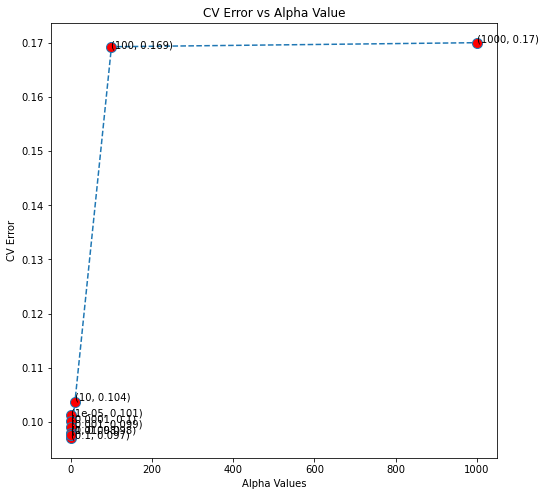

In [7]:
optimal_alpha_bow, cv_scores_bow = perform_grid_search_cv(X_train_bow, y_train)
print('Optimal Value for alpha (BoW) is:', optimal_alpha_bow)

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
plot_cv_error(cv_scores_bow, alphas)

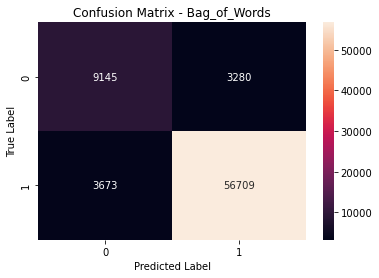

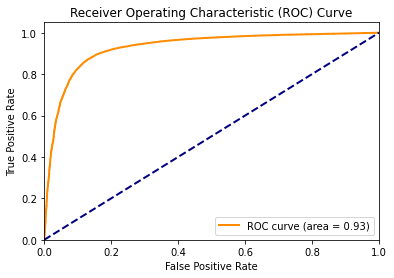

Classification Report:
+--------------+--------------------+--------------------+--------------------+--------------------+
|              |     precision      |       recall       |      f1-score      |      support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|      0       | 0.7134498361678889 | 0.7360160965794769 | 0.7245573030146971 |      12425.0       |
|      1       | 0.9453233092733668 | 0.9391706137590673 | 0.9422369175299699 |      60382.0       |
|   accuracy   | 0.9045009408436002 | 0.9045009408436002 | 0.9045009408436002 | 0.9045009408436002 |
|  macro avg   | 0.8293865727206279 | 0.837593355169272  | 0.8333971102723334 |      72807.0       |
| weighted avg | 0.9057525550418292 | 0.9045009408436002 | 0.9050884399062215 |      72807.0       |
+--------------+--------------------+--------------------+--------------------+--------------------+
Accuracy: 90.45%
ROC AUC Score: 0.93
Accuracy (BoW): 0.9045009408436

In [9]:
accuracy_bow, report_bow, roc_auc_bow = evaluate_naive_bayes(X_train_bow, y_train, X_test_bow, y_test, optimal_alpha_bow, 'Bag_of_Words')
print(f'Accuracy (BoW): {accuracy_bow}')
print(f'ROC AUC Score (BoW): {roc_auc_bow}')
print(f'Classification Report (BoW):\n', report_bow)

## TF-IDF -- Naive Bayes

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Optimal Value for alpha (TF-IDF) is: 0.1


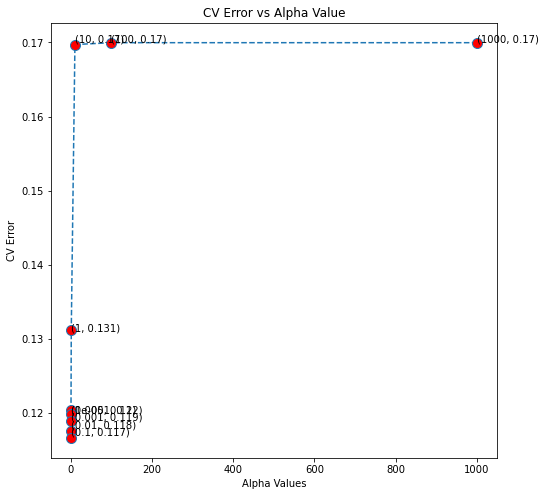

In [10]:
# Perform Grid Search CV to find the optimal alpha for TF-IDF
# This function will search for the best alpha value from the given range using cross-validation
optimal_alpha_tfidf, cv_scores_tfidf = perform_grid_search_cv(X_train_tfidf, y_train)
print('Optimal Value for alpha (TF-IDF) is:', optimal_alpha_tfidf)


# Plot the Cross-Validation error for different alpha values
# This will help visualize how the error changes with different alpha values
plot_cv_error(cv_scores_tfidf, alphas)

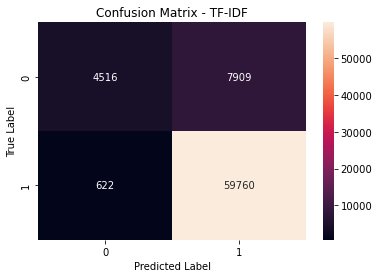

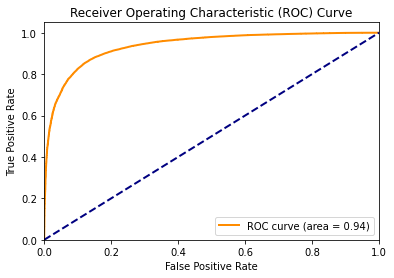

Classification Report:
+--------------+--------------------+---------------------+--------------------+--------------------+
|              |     precision      |       recall        |      f1-score      |      support       |
+--------------+--------------------+---------------------+--------------------+--------------------+
|      0       | 0.878941222265473  | 0.36346076458752513 | 0.5142629391334055 |      12425.0       |
|      1       | 0.8831222568679897 | 0.9896989168957636  | 0.9333781071604282 |      60382.0       |
|   accuracy   | 0.8828272006812532 | 0.8828272006812532  | 0.8828272006812532 | 0.8828272006812532 |
|  macro avg   | 0.8810317395667313 | 0.6765798407416443  | 0.7238205231469168 |      72807.0       |
| weighted avg | 0.8824087354354864 | 0.8828272006812532  |  0.86185330923254  |      72807.0       |
+--------------+--------------------+---------------------+--------------------+--------------------+
Accuracy: 88.28%
ROC AUC Score: 0.94
Accuracy (TF-IDF): 0.8

In [11]:
accuracy_tfidf, report_tfidf, roc_auc_tfidf = evaluate_naive_bayes(X_train_tfidf, y_train, X_test_tfidf, y_test, optimal_alpha_tfidf, 'TF-IDF')
print(f'Accuracy (TF-IDF): {accuracy_tfidf}')
print(f'ROC AUC Score (TF-IDF): {roc_auc_tfidf}')
print(f'Classification Report (TF-IDF):\n', report_tfidf)

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_w2v_scaled = scaler.fit_transform(X_train_w2v)

# Transform the cross-validation and test data
X_cv_w2v_scaled = scaler.transform(X_cv_w2v)
X_test_w2v_scaled = scaler.transform(X_test_w2v)

# Ensure all values are non-negative by adding a small constant
X_train_w2v_scaled += np.abs(X_train_w2v_scaled.min()) + 1e-10
X_cv_w2v_scaled += np.abs(X_cv_w2v_scaled.min()) + 1e-10
X_test_w2v_scaled += np.abs(X_test_w2v_scaled.min()) + 1e-10

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Optimal Value for alpha (Word2Vec) is: 1e-05


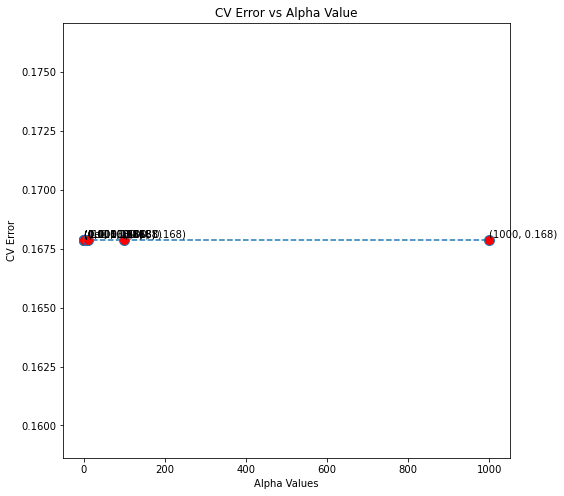

In [20]:
# Perform Grid Search CV to find the optimal alpha for Word2Vec
# This function will search for the best alpha value from the given range using cross-validation
optimal_alpha_w2v, cv_scores_w2v = perform_grid_search_cv(X_cv_w2v_scaled, y_cv)
print('Optimal Value for alpha (Word2Vec) is:', optimal_alpha_w2v)



# Plot the Cross-Validation error for different alpha values
# This will help visualize how the error changes with different alpha values
plot_cv_error(cv_scores_w2v, alphas)


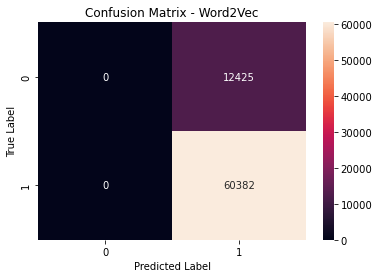

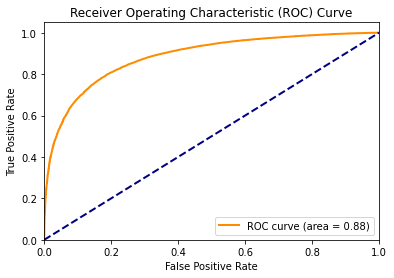

Classification Report:
+--------------+---------------------+--------------------+---------------------+--------------------+
|              |      precision      |       recall       |      f1-score       |      support       |
+--------------+---------------------+--------------------+---------------------+--------------------+
|      0       |         0.0         |        0.0         |         0.0         |      12425.0       |
|      1       | 0.8293433323718873  |        1.0         | 0.9067115152152205  |      60382.0       |
|   accuracy   | 0.8293433323718873  | 0.8293433323718873 | 0.8293433323718873  | 0.8293433323718873 |
|  macro avg   | 0.41467166618594364 |        0.5         | 0.45335575760761027 |      72807.0       |
| weighted avg | 0.6878103629497068  | 0.8293433323718873 | 0.7519751495285543  |      72807.0       |
+--------------+---------------------+--------------------+---------------------+--------------------+
Accuracy: 82.93%
ROC AUC Score: 0.88
Accuracy (W2V

In [21]:
accuracy_w2v, report_w2v, roc_auc_w2v = evaluate_naive_bayes(X_train_w2v_scaled, y_train, X_test_w2v_scaled, y_test, optimal_alpha_w2v, 'Word2Vec')
print(f'Accuracy (W2V): {accuracy_w2v}')
print(f'ROC AUC Score (W2V): {roc_auc_w2v}')
print(f'Classification Report (W2V):\n', report_w2v)

In [23]:
import pandas as pd
from tabulate import tabulate

# Assuming you have the following variables already defined:
# accuracy_bow, report_bow, roc_auc_bow
# accuracy_tfidf, report_tfidf, roc_auc_tfidf
# accuracy_w2v, report_w2v, roc_auc_w2v

# Function to extract relevant metrics from the classification reports
def extract_overall_metrics(report):
    return {
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-Score': report['macro avg']['f1-score'],
        'Accuracy': report['accuracy']
    }

# Extract overall metrics for each vectorization method
metrics_bow = extract_overall_metrics(report_bow)
metrics_tfidf = extract_overall_metrics(report_tfidf)
metrics_w2v = extract_overall_metrics(report_w2v)

# Create a DataFrame to hold the data
data = {
    'Vectorization': ['BoW', 'TF-IDF', 'Word2Vec'],
    'Accuracy': [f"{metrics_bow['Accuracy'] * 100:.2f}%", f"{metrics_tfidf['Accuracy'] * 100:.2f}%", f"{metrics_w2v['Accuracy'] * 100:.2f}%"],
    'Precision': [f"{metrics_bow['Precision']:.2f}", f"{metrics_tfidf['Precision']:.2f}", f"{metrics_w2v['Precision']:.2f}"],
    'Recall': [f"{metrics_bow['Recall']:.2f}", f"{metrics_tfidf['Recall']:.2f}", f"{metrics_w2v['Recall']:.2f}"],
    'F1-Score': [f"{metrics_bow['F1-Score']:.2f}", f"{metrics_tfidf['F1-Score']:.2f}", f"{metrics_w2v['F1-Score']:.2f}"],
    'AUC': [f"{roc_auc_bow:.2f}", f"{roc_auc_tfidf:.2f}", f"{roc_auc_w2v:.2f}"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame as a pretty table without the index column
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))

+---------------+----------+-----------+--------+----------+------+
| Vectorization | Accuracy | Precision | Recall | F1-Score | AUC  |
+---------------+----------+-----------+--------+----------+------+
|      BoW      |  90.45%  |   0.83    |  0.84  |   0.83   | 0.93 |
|    TF-IDF     |  88.28%  |   0.88    |  0.68  |   0.72   | 0.94 |
|   Word2Vec    |  82.93%  |   0.41    |  0.50  |   0.45   | 0.88 |
+---------------+----------+-----------+--------+----------+------+
